In [1]:
# for string matching
import re 

# for reading data
import pandas as pd

# for handling html data
from bs4 import BeautifulSoup

# for visualization
import matplotlib.pyplot as plt  

pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_csv('train_2kmZucJ.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
df.shape

(7920, 3)

In [4]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [5]:
df.loc[0]['tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [6]:
df.loc[4]['tweet']

"What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!"

In [7]:
df.loc[26]['tweet']

"$&@*# my ipod is all messed up and i haven't done nothing to it #$&@*# #MyLoss ! #Apple"

In [8]:
# def replace_censored(s):
#     return s.replace('$&@*#', 'censored')

In [9]:
# df['tweet'] = df['tweet'].apply(replace_censored)

In [10]:
# df.loc[26]['tweet']

In [11]:
 contractions_dict = {
        "can't": "cannot",
        "won't": "will not",
        "I'm": "I am",
        "I've": "I have",
        "you're": "you are",
        "it's": "it is",
        "we're": "we are",
        "they're": "they are",
        "that's": "that is",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "doesn't": "does not",
        "don't": "do not",
        "didn't": "did not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "wouldn't": "would not",
        "shouldn't": "should not",
        "couldn't": "could not",
        "I'll": "I will",
        "you'll": "you will",
        "he'll": "he will",
        "she'll": "she will",
        "we'll": "we will",
        "they'll": "they will"
    }

In [12]:
def cleaner(text):

  # take off html tags
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    
    text = text.replace('$&@*#', 'censored')
    
    for key, value in contractions_dict.items():
        text = text.replace(key, value)
    
    text = re.sub(r'#\w+', '', text)
  
  # fetch alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)

  # convert text to lower case
    text = text.lower()

  # split text into tokens to remove whitespaces
    tokens = text.split()

    return " ".join([word for word in tokens if len(word) > 2])

In [13]:
df['cleaned_tweet'] = df['tweet'].apply(cleaner)

In [14]:
df.loc[0]['tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
df.loc[0]['cleaned_tweet']

'test'

In [16]:
df.loc[1]['tweet']

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [17]:
df.loc[1]['cleaned_tweet']

'finally transparant silicon case thanks uncle'

In [18]:
df.loc[26]['tweet']

"$&@*# my ipod is all messed up and i haven't done nothing to it #$&@*# #MyLoss ! #Apple"

In [19]:
df.loc[26]['cleaned_tweet']

'censored ipod all messed and have not done nothing'

In [20]:
df[df['label'] == 0]['cleaned_tweet'].head(10)

0                                                                      test
1                             finally transparant silicon case thanks uncle
2                                                       love this would you
3                                       wired know george was made that way
6                                                                 happy for
7     new type charger cable new year cross young pic twitter com pjiwq wtc
8                                       bout shopping again listening music
9                                                                     photo
13      just made another crazy purchase lol theory work hard play hard lol
15                                                             from towards
Name: cleaned_tweet, dtype: object

In [21]:
df[df['label'] == 1]['cleaned_tweet'].head(10)

4             what amazing service apple will not even talk about question have unless pay them for their stupid support
5                                                            iphone software update fucked phone big time stupid iphones
10                 hey when you make new ipod dont make new color inches thinner make not crash every five fuckin minite
11                                 not heavy machinery but does what need apple really dropped the ball with that design
12                                             contemplating giving the iphone bandwagon simply because has new androids
14                             shaqlockholmes sam louise the battery painful charge overnight and lunchtime battery dead
18                                                                        the reason not have one twitter com zpggd cazn
19                                              how the apple store gunna out screens monday and the fucking apple store
22                             h

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [25]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(remove_stopwords)

In [26]:
df[df['label'] == 0]['cleaned_tweet'].head(10)

0                                                                      test
1                             finally transparant silicon case thanks uncle
2                                                                love would
3                                                wired know george made way
6                                                                     happy
7     new type charger cable new year cross young pic twitter com pjiwq wtc
8                                             bout shopping listening music
9                                                                     photo
13           made another crazy purchase lol theory work hard play hard lol
15                                                                  towards
Name: cleaned_tweet, dtype: object

In [27]:
df[df['label'] == 1]['cleaned_tweet'].head(10)

4                           amazing service apple even talk question unless pay stupid support
5                                  iphone software update fucked phone big time stupid iphones
10    hey make new ipod dont make new color inches thinner make crash every five fuckin minite
11                                       heavy machinery need apple really dropped ball design
12                                   contemplating giving iphone bandwagon simply new androids
14           shaqlockholmes sam louise battery painful charge overnight lunchtime battery dead
18                                                           reason one twitter com zpggd cazn
19                                        apple store gunna screens monday fucking apple store
22                                       new ipod four days button back broke accidentally hit
23                    iphone screen goes completely black keep getting texts day fucking check
Name: cleaned_tweet, dtype: object

In [28]:
df['len'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))

In [29]:
df.head()

,id,label,tweet,cleaned_tweet,len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,test,1
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle,6
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love would,2
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george made way,5
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,amazing service apple even talk question unless pay stupid support,10


In [30]:
df['len'].max()

32

(array([2.428e+03, 2.282e+03, 1.773e+03, 1.134e+03, 2.180e+02, 6.100e+01,
        1.400e+01, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

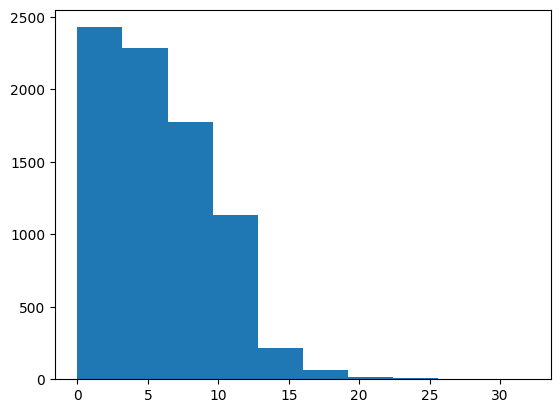

In [31]:
plt.hist(x=df['len'].values)

In [32]:
for i in range(0, 100, 10):
    print(f"{i}th percentile is {df['len'].quantile(i/100)}")

0th percentile is 0.0
10th percentile is 2.0
20th percentile is 2.0
30th percentile is 3.0
40th percentile is 4.0
50th percentile is 5.0
60th percentile is 7.0
70th percentile is 8.0
80th percentile is 9.0
90th percentile is 11.0


In [33]:
for i in range(91, 101, 1):
    print(f"{i}th percentile is {df['len'].quantile(i/100)}")

91th percentile is 11.0
92th percentile is 11.0
93th percentile is 11.0
94th percentile is 12.0
95th percentile is 12.0
96th percentile is 12.0
97th percentile is 13.0
98th percentile is 14.0
99th percentile is 16.0
100th percentile is 32.0


In [119]:
X = df['cleaned_tweet']
y = df['label'].values

In [120]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True, stratify=y)

In [121]:
print(sum(y_tr==1))
print(sum(y_tr==0))

1621
4715


In [122]:
x_tr.shape

(6336,)

In [123]:
y_tr.shape

(6336,)

In [124]:
from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# x_tr, y_tr = rus.fit_resample(x_tr, y_tr)

In [125]:
x_tr.head()

3050                           best day
2531    wait upgrade iphone load bollox
4239     thank making use way usual btw
7762         rakua know bless following
979                          suckerrrrr
Name: cleaned_tweet, dtype: object

In [126]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

#prepare a tokenizer
x_tokenizer = Tokenizer() 

x_tokenizer.fit_on_texts(x_tr)

In [127]:
x_tokenizer.word_index

{'twitter': 1,
 'com': 2,
 'new': 3,
 'iphone': 4,
 'apple': 5,
 'phone': 6,
 'follow': 7,
 'pic': 8,
 'love': 9,
 'gain': 10,
 'day': 11,
 'got': 12,
 'back': 13,
 'like': 14,
 'get': 15,
 'happy': 16,
 'censored': 17,
 'time': 18,
 'photo': 19,
 'one': 20,
 'everyone': 21,
 'must': 22,
 'make': 23,
 'would': 24,
 'app': 25,
 'followers': 26,
 'finally': 27,
 'rts': 28,
 'update': 29,
 'work': 30,
 'ipod': 31,
 'case': 32,
 'today': 33,
 'itunes': 34,
 'want': 35,
 'thanks': 36,
 'samsung': 37,
 'ios': 38,
 'good': 39,
 'ipad': 40,
 'every': 41,
 'fuck': 42,
 'hate': 43,
 'fucking': 44,
 'much': 45,
 'still': 46,
 'need': 47,
 'life': 48,
 'amazing': 49,
 'thank': 50,
 'ever': 51,
 'know': 52,
 'look': 53,
 'charger': 54,
 'buy': 55,
 'use': 56,
 'baby': 57,
 'best': 58,
 'going': 59,
 'wish': 60,
 'birthday': 61,
 'really': 62,
 'music': 63,
 'last': 64,
 'even': 65,
 'first': 66,
 'galaxy': 67,
 'minute': 68,
 'via': 69,
 'year': 70,
 'another': 71,
 'old': 72,
 'screen': 73,
 'thin

In [128]:
len(x_tokenizer.word_index)

8541

In [129]:
x_tokenizer.word_counts.items()

odict_items([('best', 71), ('day', 251), ('wait', 49), ('upgrade', 27), ('iphone', 645), ('load', 10), ('bollox', 1), ('thank', 80), ('making', 28), ('use', 72), ('way', 37), ('usual', 5), ('btw', 3), ('rakua', 1), ('know', 75), ('bless', 1), ('following', 2), ('suckerrrrr', 1), ('lol', 39), ('nicked', 1), ('iamnickd', 1), ('says', 17), ('great', 59), ('apple', 619), ('ipad', 100), ('suck', 24), ('lola', 1), ('house', 21), ('loay', 1), ('bohol', 1), ('love', 314), ('first', 66), ('time', 168), ('shooting', 5), ('phone', 604), ('signal', 2), ('internet', 9), ('wifi', 27), ('steve', 22), ('jobs', 30), ('must', 139), ('haunting', 1), ('owning', 1), ('last', 67), ('one', 161), ('think', 60), ('sums', 2), ('feelings', 2), ('obnoxious', 1), ('fanatics', 1), ('jocelynb', 2), ('radio', 4), ('broadcasts', 1), ('ethnogenesis', 1), ('blaz', 1), ('blue', 16), ('extended', 1), ('soul', 4), ('sacrifice', 1), ('members', 3), ('december', 7), ('santa', 5), ('early', 21), ('year', 65), ('hail', 1), ('l

In [130]:
thresh = 3

cnt=0
for key,value in x_tokenizer.word_counts.items():
  if value>=thresh:
    cnt=cnt+1

print(cnt)

1862


In [131]:
# prepare the tokenizer again
x_tokenizer = Tokenizer(num_words=cnt,oov_token='unk')

#prepare vocabulary
x_tokenizer.fit_on_texts(x_tr)

In [132]:
# maximum sequence length allowed
max_len = 12

#convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding up with zero 
x_tr_seq = pad_sequences(x_tr_seq,  padding='post', maxlen=max_len)
x_val_seq = pad_sequences(x_val_seq, padding='post', maxlen=max_len)

In [145]:
x_tr_seq.shape

(6336, 12)

In [134]:
# rus = RandomUnderSampler(random_state=0)
# x_tr_seq, y_tr = rus.fit_resample(x_tr_seq, y_tr)

In [135]:
print(sum(y_tr==1))
print(sum(y_tr==0))

1621
4715


In [136]:
#no. of unique words
x_voc_size = len(x_tokenizer.word_index) + 1
x_voc_size

8543

In [137]:
x_tr_seq[0]

array([59, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [138]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
import tensorflow as tf

In [140]:
def f1_score_weighted(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred = tf.round(y_pred)

    # Calculate precision and recall
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate F1 score
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())

    # Calculate weighted F1 score
    weights = K.sum(y_true, axis=0)
    weighted_f1 = K.sum(weights * f1) / K.sum(weights + K.epsilon())

    return weighted_f1


In [141]:
#sequential model
model = Sequential()

#embedding layer
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

#rnn layer
model.add(SimpleRNN(12,activation='relu'))

#dense layer
model.add(Dense(6,activation='relu')) 

#output layer
model.add(Dense(1,activation='sigmoid'))

In [142]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 12, 50)            427150    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 12)                756       
                                                                 
 dense_6 (Dense)             (None, 6)                 78        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 427,991
Trainable params: 427,991
Non-trainable params: 0
_________________________________________________________________


In [143]:
#define optimizer and loss
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[f1_score_weighted])
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [144]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [146]:
#train the model 
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, validation_data=(x_val_seq, y_val), callbacks=[early_stopping])

Epoch 1/20
50/50 [==============================] - 5s 31ms/step - loss: 0.6276 - f1_score_weighted: 0.0674 - val_loss: 0.5552 - val_f1_score_weighted: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 1s 18ms/step - loss: 0.4890 - f1_score_weighted: 0.0014 - val_loss: 0.4591 - val_f1_score_weighted: 0.0320
Epoch 3/20
50/50 [==============================] - 1s 18ms/step - loss: 0.3763 - f1_score_weighted: 0.4973 - val_loss: 0.3849 - val_f1_score_weighted: 0.6087
Epoch 4/20
50/50 [==============================] - 1s 19ms/step - loss: 0.2884 - f1_score_weighted: 0.7976 - val_loss: 0.3617 - val_f1_score_weighted: 0.7013
Epoch 5/20
50/50 [==============================] - 1s 18ms/step - loss: 0.2283 - f1_score_weighted: 0.8555 - val_loss: 0.3742 - val_f1_score_weighted: 0.7125
Epoch 6/20
50/50 [==============================] - 1s 18ms/step - loss: 0.1908 - f1_score_weighted: 0.8739 - val_loss: 0.3954 - val_f1_score_weighted: 0.7103
Epoch 7/20
50/50 [========================

In [147]:
y_val_pred = model.predict(x_val_seq)
y_val_pred = (y_val_pred > 0.5).astype(int)

50/50 [==============================] - 0s 3ms/step


In [148]:
y_val

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
y_val_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [150]:
from sklearn.metrics import confusion_matrix, classification_report

In [151]:
confusion_matrix(y_val, y_val_pred)

array([[1047,  132],
       [ 111,  294]], dtype=int64)

In [152]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1179
           1       0.69      0.73      0.71       405

    accuracy                           0.85      1584
   macro avg       0.80      0.81      0.80      1584
weighted avg       0.85      0.85      0.85      1584



In [153]:
y_train_pred = model.predict(x_tr_seq)
y_train_pred = (y_train_pred > 0.5).astype(int)

198/198 [==============================] - 1s 3ms/step


In [154]:
y_tr

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [155]:
y_train_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [156]:
confusion_matrix(y_tr, y_train_pred)

array([[4415,  300],
       [ 193, 1428]], dtype=int64)

In [157]:
print(classification_report(y_tr, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4715
           1       0.83      0.88      0.85      1621

    accuracy                           0.92      6336
   macro avg       0.89      0.91      0.90      6336
weighted avg       0.92      0.92      0.92      6336



In [159]:
df_sa = pd.read_csv('sample_submission_LnhVWA4.csv')
df_sa.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [160]:
df_t = pd.read_csv('test_12QyDcx.csv')
df_t.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [161]:
df_t['cleaned_tweet'] = df_t['tweet'].apply(cleaner)

In [162]:
df_t['cleaned_tweet'] = df_t['cleaned_tweet'].apply(remove_stopwords)

In [163]:
df_t.head()

,id,tweet,cleaned_tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,hate new upgrade let download apps sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting fucking pants
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",like puts roms ipad possible yes would block screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",ipod officially dead lost pictures videos sos concert vet camp
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,fighting itunes night want music censored paid


In [164]:
X_t = df_t['cleaned_tweet']

In [165]:
x_t_seq = x_tokenizer.texts_to_sequences(X_t) 

x_t_seq = pad_sequences(x_t_seq,  padding='post', maxlen=max_len)

In [166]:
y_t_pred = model.predict(x_t_seq)
y_t_pred = (y_t_pred > 0.5).astype(int)

62/62 [==============================] - 0s 3ms/step


In [167]:
y_t_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [168]:
df_t.shape

(1953, 3)

In [169]:
y_t_pred.shape

(1953, 1)

In [170]:
df_t['label'] = y_t_pred

In [171]:
df_t.head()

,id,tweet,cleaned_tweet,label
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,hate new upgrade let download apps sucks,1
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,currently shitting fucking pants,0
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n",like puts roms ipad possible yes would block screen,1
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",ipod officially dead lost pictures videos sos concert vet camp,1
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,fighting itunes night want music censored paid,1


In [172]:
df_submit = df_t[['id', 'label']]

In [173]:
df_submit.to_csv('submission.csv', index=False)

In [42]:
model = Sequential()
# model.add(Embedding(x_voc_size, embedding_dim))
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(64))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 50)            765450    
                                                                 
 lstm (LSTM)                 (None, 24, 32)            10624     
                                                                 
 batch_normalization (BatchN  (None, 24, 32)           128       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)               

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[f1_score_weighted])

In [45]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, validation_data=(x_val_seq, y_val))

Epoch 1/20
50/50 [==============================] - 22s 181ms/step - loss: 0.4081 - f1_score_weighted: 0.6810 - val_loss: 0.6001 - val_f1_score_weighted: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 4s 88ms/step - loss: 0.2198 - f1_score_weighted: 0.8230 - val_loss: 0.5373 - val_f1_score_weighted: 0.0000e+00
Epoch 3/20
50/50 [==============================] - 4s 89ms/step - loss: 0.1525 - f1_score_weighted: 0.8842 - val_loss: 0.5241 - val_f1_score_weighted: 0.0000e+00
Epoch 4/20
50/50 [==============================] - 5s 104ms/step - loss: 0.1161 - f1_score_weighted: 0.9195 - val_loss: 0.5107 - val_f1_score_weighted: 0.0000e+00
Epoch 5/20
50/50 [==============================] - 5s 101ms/step - loss: 0.0809 - f1_score_weighted: 0.9461 - val_loss: 0.6142 - val_f1_score_weighted: 0.0000e+00
Epoch 6/20
50/50 [==============================] - 5s 92ms/step - loss: 0.0607 - f1_score_weighted: 0.9591 - val_loss: 0.5298 - val_f1_score_weighted: 0.0442
Epoch 7/20
50/50 [====

In [61]:
embedding_dim = 128

model = Sequential()
# model.add(Embedding(x_voc_size, embedding_dim))
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

model.add(LSTM(16, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(32))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 24, 50)            765400    
                                                                 
 lstm_8 (LSTM)               (None, 24, 16)            4288      
                                                                 
 batch_normalization_8 (Batc  (None, 24, 16)           64        
 hNormalization)                                                 
                                                                 
 lstm_9 (LSTM)               (None, 32)                6272      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)               

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, validation_data=(x_val_seq, y_val))

Epoch 1/20
50/50 [==============================] - 20s 146ms/step - loss: 0.4713 - accuracy: 0.7607 - val_loss: 0.6164 - val_accuracy: 0.7437
Epoch 2/20
50/50 [==============================] - 3s 67ms/step - loss: 0.1984 - accuracy: 0.9295 - val_loss: 0.5534 - val_accuracy: 0.7437
Epoch 3/20
50/50 [==============================] - 3s 67ms/step - loss: 0.0927 - accuracy: 0.9729 - val_loss: 0.5365 - val_accuracy: 0.7437
Epoch 4/20
50/50 [==============================] - 3s 68ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.5045 - val_accuracy: 0.7437
Epoch 5/20
50/50 [==============================] - 3s 68ms/step - loss: 0.0287 - accuracy: 0.9926 - val_loss: 0.5321 - val_accuracy: 0.7443
Epoch 6/20
50/50 [==============================] - 3s 68ms/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.6244 - val_accuracy: 0.7443
Epoch 7/20
50/50 [==============================] - 4s 76ms/step - loss: 0.0134 - accuracy: 0.9978 - val_loss: 0.5005 - val_accuracy: 0.7708
Epoch 8/20


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(32, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score_weighted])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

model.fit(x_tr_seq, y_tr, batch_size=128, epochs=20, verbose=1, 
          validation_data=(x_val_seq, y_val), callbacks=[early_stopping, reduce_lr])


Epoch 1/20
50/50 [==============================] - 21s 153ms/step - loss: 1.2864 - f1_score_weighted: 0.5253 - val_loss: 1.1996 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 2/20
50/50 [==============================] - 4s 75ms/step - loss: 0.8262 - f1_score_weighted: 0.7352 - val_loss: 0.9523 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - 4s 75ms/step - loss: 0.5914 - f1_score_weighted: 0.8304 - val_loss: 0.8710 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 4/20
50/50 [==============================] - 4s 76ms/step - loss: 0.4257 - f1_score_weighted: 0.8999 - val_loss: 0.9179 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 5/20
50/50 [==============================] - 4s 75ms/step - loss: 0.3192 - f1_score_weighted: 0.9371 - val_loss: 0.9379 - val_f1_score_weighted: 0.0000e+00 - lr: 0.0010
Epoch 6/20
50/50 [==============================] - 4s 77ms/step - loss: 0.2550 - f1_score_weighted: 0.9615 - val_loss

In [69]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=40, verbose=1, 
          validation_data=(x_val_seq, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/40
50/50 [==============================] - 4s 89ms/step - loss: 0.1393 - f1_score_weighted: 0.9890 - val_loss: 0.6267 - val_f1_score_weighted: 0.6872 - lr: 1.0000e-04
Epoch 2/40
50/50 [==============================] - 4s 76ms/step - loss: 0.1330 - f1_score_weighted: 0.9889 - val_loss: 0.6325 - val_f1_score_weighted: 0.6821 - lr: 1.0000e-04
Epoch 3/40
50/50 [==============================] - 4s 77ms/step - loss: 0.1237 - f1_score_weighted: 0.9956 - val_loss: 0.6455 - val_f1_score_weighted: 0.6800 - lr: 1.0000e-04
Epoch 4/40
50/50 [==============================] - 4s 80ms/step - loss: 0.1218 - f1_score_weighted: 0.9938 - val_loss: 0.6536 - val_f1_score_weighted: 0.6881 - lr: 1.0000e-04
Epoch 5/40
50/50 [==============================] - 4s 77ms/step - loss: 0.1143 - f1_score_weighted: 0.9951 - val_loss: 0.6551 - val_f1_score_weighted: 0.6872 - lr: 1.0000e-04
Epoch 6/40
50/50 [==============================] - 4s 76ms/step - loss: 0.1123 - f1_score_weighted: 0.9935 - val_loss: 